In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [61]:
#Loading dataset
data = pd.read_csv('/content/sample_data/imdb.csv')
data.head()

,Name,Date,Rate,Votes,Genre,Duration,Type,Certificate,Episodes,Nudity,Violence,Profanity,Alcohol,Frightening
0,No Time to Die,2021,7.6,"107,163","Action, Adventure, Thriller",163,Film,PG-13,-,Mild,Moderate,Mild,Mild,Moderate
1,The Guilty,2021,6.3,"64,375","Crime, Drama, Thriller",90,Film,R,-,None,None,Severe,None,Moderate
2,The Many Saints of Newark,2021,6.4,"27,145","Crime, Drama",120,Film,R,-,Moderate,Severe,Severe,Moderate,Moderate
3,Venom: Let There Be Carnage,2021,6.4,"30,443","Action, Adventure, Sci-Fi",97,Film,PG-13,-,None,Moderate,Moderate,Mild,Moderate
4,Dune,2021,8.3,"84,636","Action, Adventure, Drama",155,Film,PG-13,-,None,Moderate,None,Mild,Moderate


In [62]:
#Changing Rate Column into numeric data
data['Rate'] = pd.to_numeric(data['Rate'], errors = 'coerce') 
data[data['Rate'].isnull()]

,Name,Date,Rate,Votes,Genre,Duration,Type,Certificate,Episodes,Nudity,Violence,Profanity,Alcohol,Frightening
7,House of the Dragon,2021,NaN,No Votes,"Action, Adventure, Drama",None,Series,None,10,No Rate,No Rate,No Rate,No Rate,No Rate
24,Resident Evil: Welcome to Raccoon City,2021,NaN,No Votes,"Action, Horror, Mystery",107,Film,R,-,No Rate,No Rate,No Rate,No Rate,No Rate
34,"Tick, Tick... Boom!",2021,NaN,No Votes,"Biography, Drama, Musical",115,Film,PG-13,-,No Rate,No Rate,No Rate,No Rate,No Rate
70,Eternals,2021,NaN,No Votes,"Action, Adventure, Drama",157,Film,PG-13,-,No Rate,No Rate,No Rate,No Rate,No Rate
85,Last Man Down,2021,NaN,No Votes,Action,87,Film,R,-,No Rate,No Rate,No Rate,No Rate,No Rate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5983,The Time Traveler's Wife,1996,NaN,No Votes,"Animation, Drama, Fantasy",None,Series,None,6,No Rate,No Rate,No Rate,No Rate,No Rate
5987,The Long Home,2019,NaN,No Votes,Drama,96,Film,None,-,No Rate,No Rate,No Rate,No Rate,No Rate
5988,Blade Runner: Black Lotus,2019,NaN,No Votes,"Animation, Action, Crime",None,Series,None,13,No Rate,No Rate,No Rate,No Rate,No Rate
6108,The Creed of Violence,2008,NaN,No Votes,"Action, Crime, Drama",None,Film,None,-,No Rate,No Rate,No Rate,No Rate,No Rate


In [63]:
#Replacing missing value with 0
data.fillna(0, inplace = True)

In [64]:
#Do the same for column Votes, Duration, and Episodes
data['Votes'] = data['Votes'].replace(",", "", regex=True)
data['Votes'] = pd.to_numeric(data['Votes'], errors = 'coerce')
data['Duration'] = pd.to_numeric(data['Duration'], errors = 'coerce')
data['Episodes'] = pd.to_numeric(data['Episodes'], errors = 'coerce')
data.fillna(0, inplace = True)

#Changing column type to integer
data['Votes'] = data['Votes'].astype('int')
data['Duration'] = data['Duration'].astype('int')
data['Episodes'] = data['Episodes'].astype('int')

In [65]:
#Finding unique value
data['Frightening'].unique()

array(['Moderate', 'None', 'Mild', 'No Rate', 'Severe'], dtype=object)

In [66]:
#Replacing strings value to numeric value
data = data.replace({'None':0,'Mild':1,'Moderate':2,'Severe':3,'No Rate':0})
data.head()

,Name,Date,Rate,Votes,Genre,Duration,Type,Certificate,Episodes,Nudity,Violence,Profanity,Alcohol,Frightening
0,No Time to Die,2021,7.6,107163,"Action, Adventure, Thriller",163,Film,PG-13,0,1,2,1,1,2
1,The Guilty,2021,6.3,64375,"Crime, Drama, Thriller",90,Film,R,0,0,0,3,0,2
2,The Many Saints of Newark,2021,6.4,27145,"Crime, Drama",120,Film,R,0,2,3,3,2,2
3,Venom: Let There Be Carnage,2021,6.4,30443,"Action, Adventure, Sci-Fi",97,Film,PG-13,0,0,2,2,1,2
4,Dune,2021,8.3,84636,"Action, Adventure, Drama",155,Film,PG-13,0,0,2,0,1,2


In [67]:
#Replacing Type column values(film & series) with 0 and 1
data = data.replace({'Film':0,'Series':1})
data.head()

,Name,Date,Rate,Votes,Genre,Duration,Type,Certificate,Episodes,Nudity,Violence,Profanity,Alcohol,Frightening
0,No Time to Die,2021,7.6,107163,"Action, Adventure, Thriller",163,0,PG-13,0,1,2,1,1,2
1,The Guilty,2021,6.3,64375,"Crime, Drama, Thriller",90,0,R,0,0,0,3,0,2
2,The Many Saints of Newark,2021,6.4,27145,"Crime, Drama",120,0,R,0,2,3,3,2,2
3,Venom: Let There Be Carnage,2021,6.4,30443,"Action, Adventure, Sci-Fi",97,0,PG-13,0,0,2,2,1,2
4,Dune,2021,8.3,84636,"Action, Adventure, Drama",155,0,PG-13,0,0,2,0,1,2


In [68]:
#Droping duplicate data)
data = data.drop_duplicates(keep = 'first')

In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5028 entries, 0 to 5027
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         5028 non-null   object 
 1   Date         5028 non-null   int64  
 2   Rate         5028 non-null   float64
 3   Votes        5028 non-null   int64  
 4   Genre        5028 non-null   object 
 5   Duration     5028 non-null   int64  
 6   Type         5028 non-null   int64  
 7   Certificate  5028 non-null   object 
 8   Episodes     5028 non-null   int64  
 9   Nudity       5028 non-null   int64  
 10  Violence     5028 non-null   int64  
 11  Profanity    5028 non-null   int64  
 12  Alcohol      5028 non-null   int64  
 13  Frightening  5028 non-null   int64  
dtypes: float64(1), int64(10), object(3)
memory usage: 589.2+ KB


In [70]:
data.describe()

,Date,Rate,Votes,Duration,Type,Episodes,Nudity,Violence,Profanity,Alcohol,Frightening
count,5028.000000,5028.000000,5.028000e+03,5028.000000,5028.000000,5028.000000,5028.000000,5028.000000,5028.000000,5028.000000,5028.000000
mean,2006.159905,6.718894,1.327373e+05,90.015115,0.286794,39.942323,1.011734,1.489857,1.391408,1.015314,1.365354
std,15.789378,1.590262,2.068850e+05,45.909037,0.452309,422.023431,0.924256,1.052669,1.009573,0.778135,1.034692
min,1922.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1998.000000,6.200000,1.335275e+04,60.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
50%,2011.000000,7.000000,6.011400e+04,98.000000,0.000000,0.000000,1.000000,2.000000,1.000000,1.000000,1.000000
75%,2019.000000,7.700000,1.669210e+05,116.000000,1.000000,10.000000,2.000000,2.000000,2.000000,1.000000,2.000000
max,2023.000000,9.700000,2.474122e+06,900.000000,1.000000,14301.000000,3.000000,3.000000,3.000000,3.000000,3.000000


In [71]:
#managing the genres with 0 and 1
df = data.copy()
df.Genre = df.Genre.str.replace(' ','')
genre_cols = df.Genre.str.get_dummies(sep=',')
genre_cols

,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,...,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western
0,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5023,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5024,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5025,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
5026,0,0,0,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0


In [72]:
#Join new genre column with dataset
df = pd.concat([df, genre_cols], axis=1, join='inner')
df = df.drop(columns = 'Genre') #Remove old Genre column from dataset
df.head()

,Name,Date,Rate,Votes,Duration,Type,Certificate,Episodes,Nudity,Violence,...,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western
0,No Time to Die,2021,7.6,107163,163,0,PG-13,0,1,2,...,0,0,0,0,0,0,0,1,0,0
1,The Guilty,2021,6.3,64375,90,0,R,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,The Many Saints of Newark,2021,6.4,27145,120,0,R,0,2,3,...,0,0,0,0,0,0,0,0,0,0
3,Venom: Let There Be Carnage,2021,6.4,30443,97,0,PG-13,0,0,2,...,0,0,0,1,0,0,0,0,0,0
4,Dune,2021,8.3,84636,155,0,PG-13,0,0,2,...,0,0,0,0,0,0,0,0,0,0


In [73]:
#Sorting dataset from oldest to newest
df = df.sort_values(by = 'Date')
df

,Name,Date,Rate,Votes,Duration,Type,Certificate,Episodes,Nudity,Violence,...,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western
3107,Nosferatu,1922,7.9,92629,94,0,Not Rated,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2945,Metropolis,1927,8.3,167247,153,0,Not Rated,0,1,1,...,0,0,0,1,0,0,0,0,0,0
2220,Frankenstein,1931,7.8,68780,70,0,Passed,0,0,1,...,0,0,0,1,0,0,0,0,0,0
3594,M - Eine Stadt sucht einen Mörder,1931,8.3,151051,117,0,Passed,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2221,The Wilds,1931,7.3,13430,0,1,TV-14,17,2,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4722,One Foot in the Grave,2023,7.8,6070,90,1,TV-PG,44,0,1,...,0,0,0,0,0,0,0,0,0,0
4721,Ant-Man and the Wasp: Quantumania,2023,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2001,Oppenheimer,2023,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2021,Wonka,2023,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [74]:
#Counting value by year
df['Date'].value_counts()

2021    649
2019    283
2020    272
2018    202
2017    182
       ... 
1944      1
1946      1
1948      1
1951      1
1922      1
Name: Date, Length: 91, dtype: int64

In [75]:
#Grouping based on Genre
genre_data = data.groupby(['Genre']).mean()
genre_data = genre_data.sort_values(by = 'Rate', ascending = False)
genre_data[['Rate', 'Duration']].head()

,Rate,Duration
Genre,,
"Animation, Family",9.6,7.0
"Comedy, Game-Show",9.0,60.0
"Comedy, History, News",8.9,30.0
"Documentary, Drama, History",8.8,60.0
"Animation, Crime, Drama",8.8,24.0


In [76]:
#Filtering dataset by year and rating
df_2021 = df[(df['Date'] == 2021) & (df['Rate'] > 8.7)]
df_2021 = df_2021[['Name', 'Date', 'Rate', 'Votes', 'Type']]
df_2021

,Name,Date,Rate,Votes,Type
495,Narcos,2021,8.8,383542,1
476,Gaetmaeul Chachacha,2021,9.0,2789,1
1003,The Black Phone,2021,8.9,132,0
819,Toma,2021,9.3,5562,0
276,One Piece: Wan pîsu,2021,8.8,86612,1
69,Friends,2021,8.8,903947,1
96,Rick and Morty,2021,9.2,436882,1
52,Breaking Bad,2021,9.4,1593305,1
16,Seinfeld,2021,8.8,272028,1
13,The Sopranos,2021,9.2,340006,1


In [77]:
#Create new column with conditions
conditions = [(df_2021['Rate'] < 9.0),(df_2021['Rate'] >= 9.0)]
choices = ['Great', 'Excellent']

df_2021['Rate_Category'] = np.select(conditions, choices)
df_2021

,Name,Date,Rate,Votes,Type,Rate_Category
495,Narcos,2021,8.8,383542,1,Great
476,Gaetmaeul Chachacha,2021,9.0,2789,1,Excellent
1003,The Black Phone,2021,8.9,132,0,Great
819,Toma,2021,9.3,5562,0,Excellent
276,One Piece: Wan pîsu,2021,8.8,86612,1,Great
69,Friends,2021,8.8,903947,1,Great
96,Rick and Morty,2021,9.2,436882,1,Excellent
52,Breaking Bad,2021,9.4,1593305,1,Excellent
16,Seinfeld,2021,8.8,272028,1,Great
13,The Sopranos,2021,9.2,340006,1,Excellent


In [78]:
#Create Pivot Table
pd.pivot_table(df_2021, values='Rate', index=['Date'], columns=['Name'], aggfunc=np.mean)

Name,Better Call Saul,Black Mirror,Breaking Bad,Cartel,Come from Away,Dark Side of the Ring,Friends,Gaetmaeul Chachacha,Game of Thrones,It's Always Sunny in Philadelphia,...,Rick and Morty,Sardar Udham,Seinfeld,Shingeki no kyojin,Ted Lasso,The Black Phone,The Sopranos,The Wire,Toma,True Detective
Date,,,,,,,,,,,,,,,,,,,,,
2021,8.8,8.8,9.4,8.9,8.8,8.8,8.8,9.0,9.2,8.8,...,9.2,9.2,8.8,9.0,8.8,8.9,9.2,9.3,9.3,8.9


In [79]:
!pip install --upgrade plotly
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(rows=9, cols=1)

Date = go.Histogram(x = data['Date'])

Rate = go.Histogram(x = data['Rate'])

Vote = go.Histogram(x = data['Votes'])

Duration = go.Histogram(x = data['Duration'])

Episodes = go.Histogram(x = data['Episodes'])

Nudity = go.Histogram(x = data['Nudity'])

Alcohol = go.Histogram(x = data['Alcohol'])

Frightening = go.Histogram(x = data['Frightening'])

Violence = go.Histogram(x = data['Violence'])

fig.append_trace(Date, 1, 1)
fig.append_trace(Rate, 2, 1)
fig.append_trace(Vote, 3, 1)
fig.append_trace(Duration, 4, 1)
fig.append_trace(Episodes, 5, 1)
fig.append_trace(Nudity, 6, 1)
fig.append_trace(Alcohol, 7, 1)
fig.append_trace(Frightening, 8, 1)
fig.append_trace(Violence, 9, 1)
fig.update_layout(autosize=False,width=800,height=1200)
fig.show()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [80]:
temp1 = (data.sort_values(by=['Rate'],ascending=False)).head(10)
fig = px.sunburst(temp1,path=[i for i in temp1.columns],color='Rate') 
fig.show()

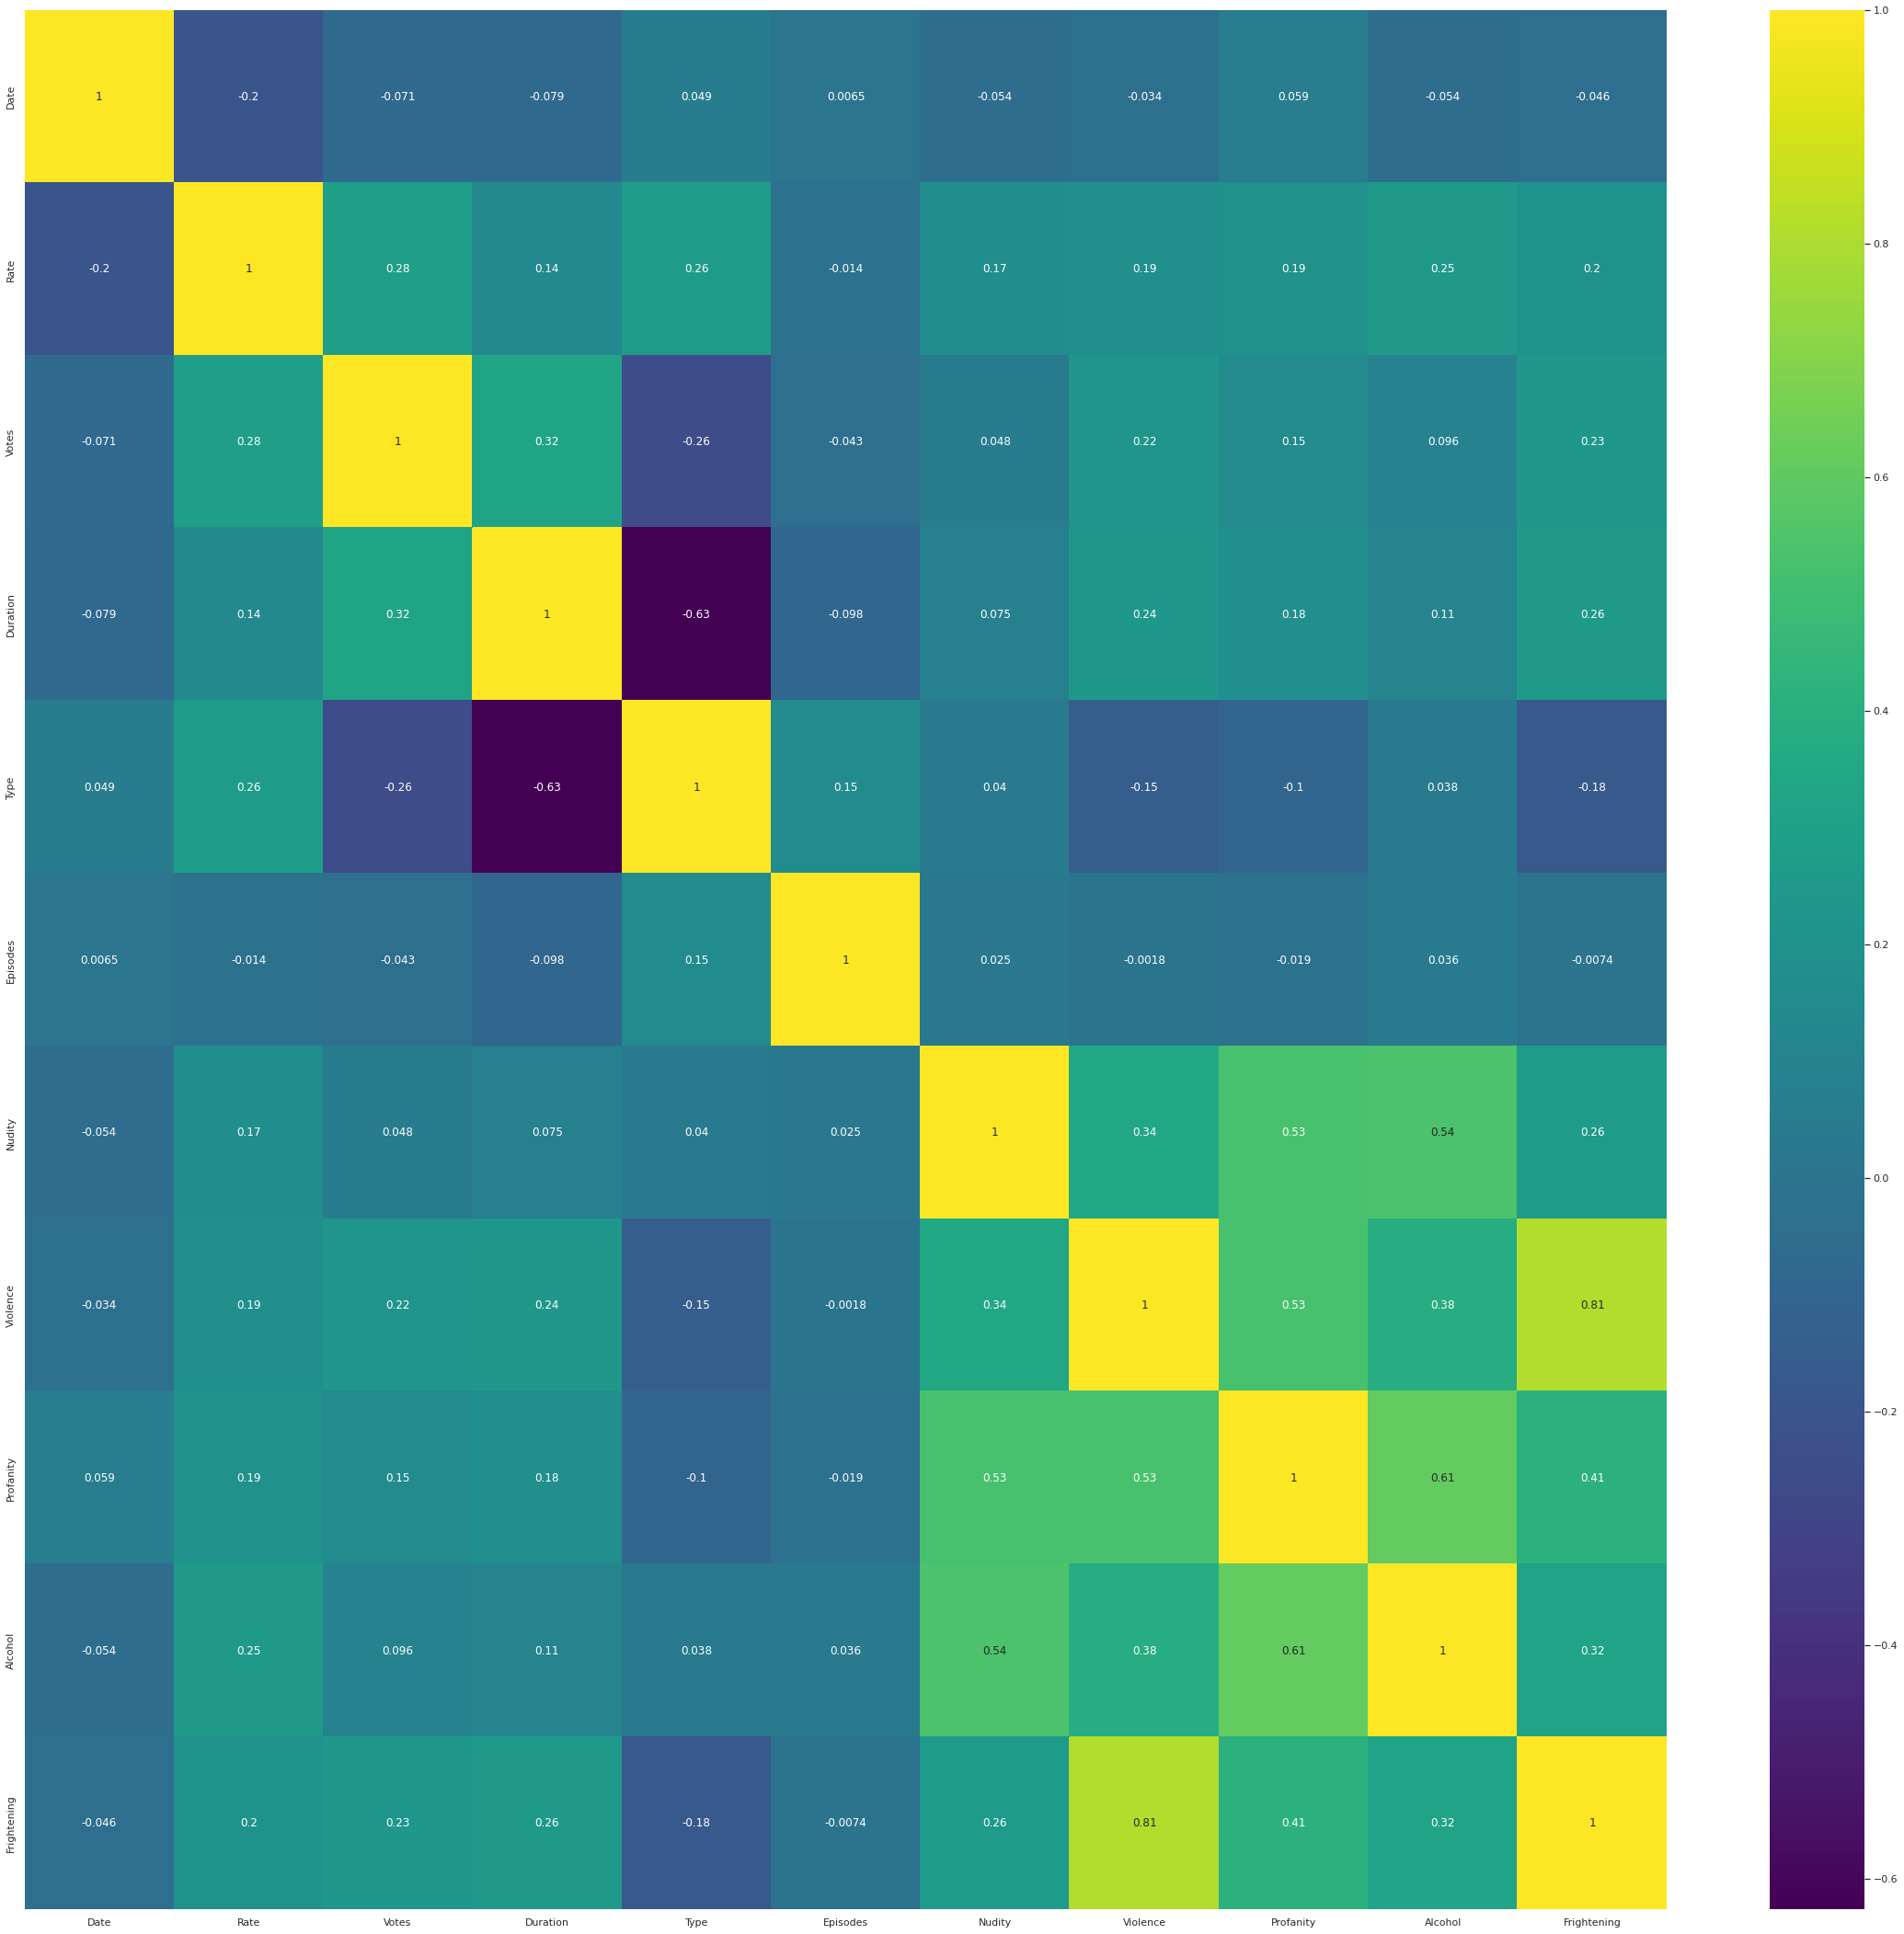

In [81]:
corr = data.corr()
plt.figure(figsize=(40,38)) 
sns.heatmap(corr, cmap='viridis', annot=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



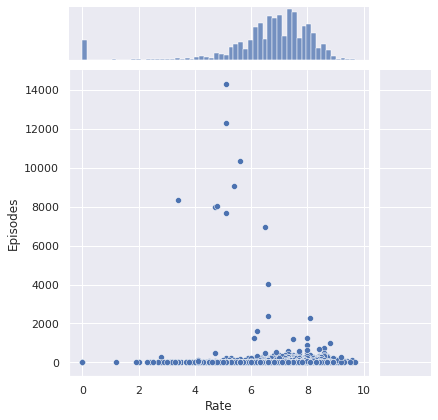

In [82]:
sns.jointplot(data['Rate'],data['Episodes'])

<Figure size 2160x720 with 0 Axes>

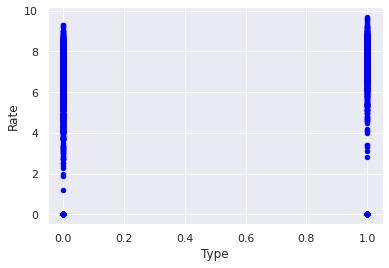

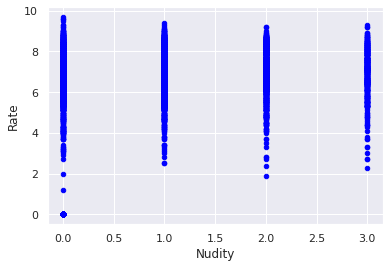

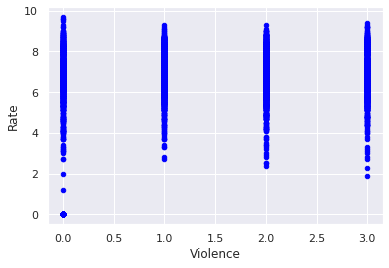

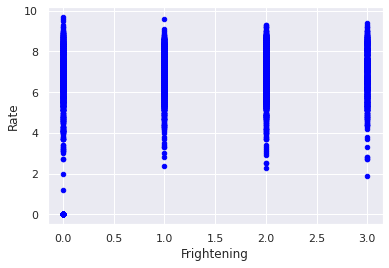

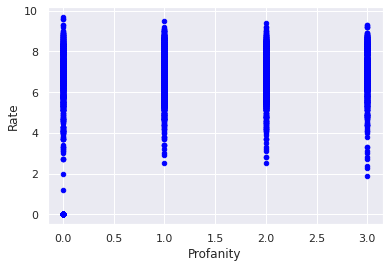

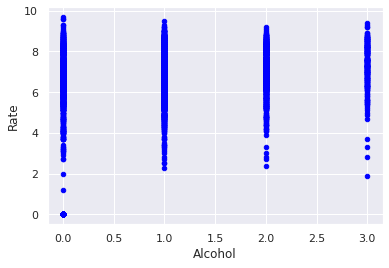

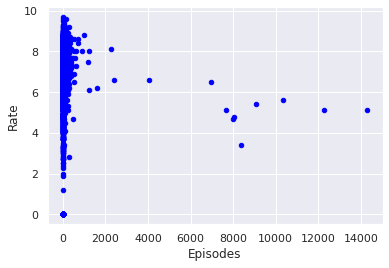

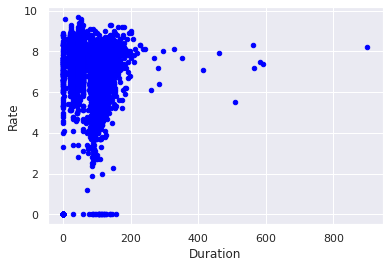

In [94]:
plt.figure(figsize = (30, 10))
data.plot(kind='scatter',x='Type',y ='Rate', color = 'blue')
data.plot(kind='scatter',x='Nudity',y ='Rate', color = 'blue')
data.plot(kind='scatter',x='Violence',y ='Rate', color = 'blue')
data.plot(kind='scatter',x='Frightening',y ='Rate', color = 'blue')
data.plot(kind='scatter',x='Profanity',y ='Rate', color = 'blue')
data.plot(kind='scatter',x='Alcohol',y ='Rate', color = 'blue')
data.plot(kind='scatter',x='Episodes',y ='Rate', color = 'blue')
data.plot(kind='scatter',x='Duration',y ='Rate', color = 'blue')
plt.show()


In [84]:
fig = make_subplots(rows=2,cols=2,specs=[[{'type':'bar'},{'type':'bar'}],
                                         [{'type':'bar'},{'type':'pie'}]],
                   column_widths=[0.45,0.45],row_heights=[0.40,0.40],
                   subplot_titles=['Votes Distribution','Rating Distribution','Duration Distribution','Type'])

fig.add_traces(go.Histogram(x = data['Votes']),1,1)

fig.add_traces(go.Histogram(x = data['Rate']),1,2)

fig.add_traces(go.Histogram(x = data['Duration']),2,1)

fig.add_traces(go.Pie(labels = data['Type'].value_counts().index,
                      values = data['Type'].value_counts(),
                      hole=.6,
                     textinfo='label+percent'),2,2)

fig.add_annotation(showarrow=False,text='Film Or Series', x=0.81,y=0.2, xref="paper", yref="paper",font=dict(color='grey',size=14))

fig.update_layout(height=900)

fig.update_layout(margin={'b':0,'l':0,'r':0,'t':160},
                  paper_bgcolor='rgb(248,248,255)',
                  plot_bgcolor = 'rgb(248,248,255)',
                  title={'font':{
                             'family':'monospace',
                             'size':22,
                             'color': 'grey'
                         },'text':'Univariate Analysis',
                        'x':0.45,'y':0.9},
                 showlegend=False)

fig.show()

In [85]:
genres = pd.DataFrame(data.Genre.str.split(',', expand=True).stack(), columns= ['Genre'])  
genres = genres.reset_index(drop = True)  
genres['Genre'] = genres['Genre'].str.lstrip()
genres['Genre'] = genres['Genre'].str.rstrip()

genre_count = pd.DataFrame(genres.groupby(by = ['Genre']).size(),columns = ['count'])  
genre_count = genre_count.reset_index().sort_values(by='count',ascending=False)

fig = px.bar(x = genre_count['Genre'],
             y = genre_count['count'],
            text = genre_count['count'],
            title='Genre Count')

fig.update_traces(textposition='outside',marker=dict(color=genre_count['count'],colorscale='PuBu'))

fig.update_layout(margin={'b':0,'l':0,'r':0},
                   paper_bgcolor ='rgb(248,248,255)',
                   plot_bgcolor = 'rgb(248,248,255)',
                   title={'font':{
                             'family':'monospace',
                             'size':22,
                             'color': 'grey'
                         },
                        'x':0.45,'y':0.9})
fig.show()

In [93]:
features = ('Type','Nudity','Violence','Frightening','Profanity','Alcohol','Episodes','Duration')

for feat in features:
    fig = (px.scatter(x=data[feat], y=data['Rate'], trendline='ols',trendline_color_override='blue',title=feat + str(' VS Rating'))
    .update_traces(marker = dict(size = 5, color='green')))
    fig.update_layout(margin={'b':0,'l':0,'r':0,'t':150},
                  paper_bgcolor='rgb(248,248,255)',
                  plot_bgcolor = 'rgb(248,248,255)',
                   title={'font':{'family':'monospace','size':22,'color': 'blue'},'x':0.45,'y':0.9},height=600)
    fig.show()